# Multiple Linear Regression

## Import the libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Load "50_Startups" dataset

To start with we have taken the data of 50 Startup Companies. The data is in the form of a .csv format that contains the following details about the startups:

- R&D Spend
- Administration
- Marketing Spend
- State
- **Profit** (Response variable)

In [47]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Dataset Info and Descriptives

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


## Correlation and Graphs

In [50]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


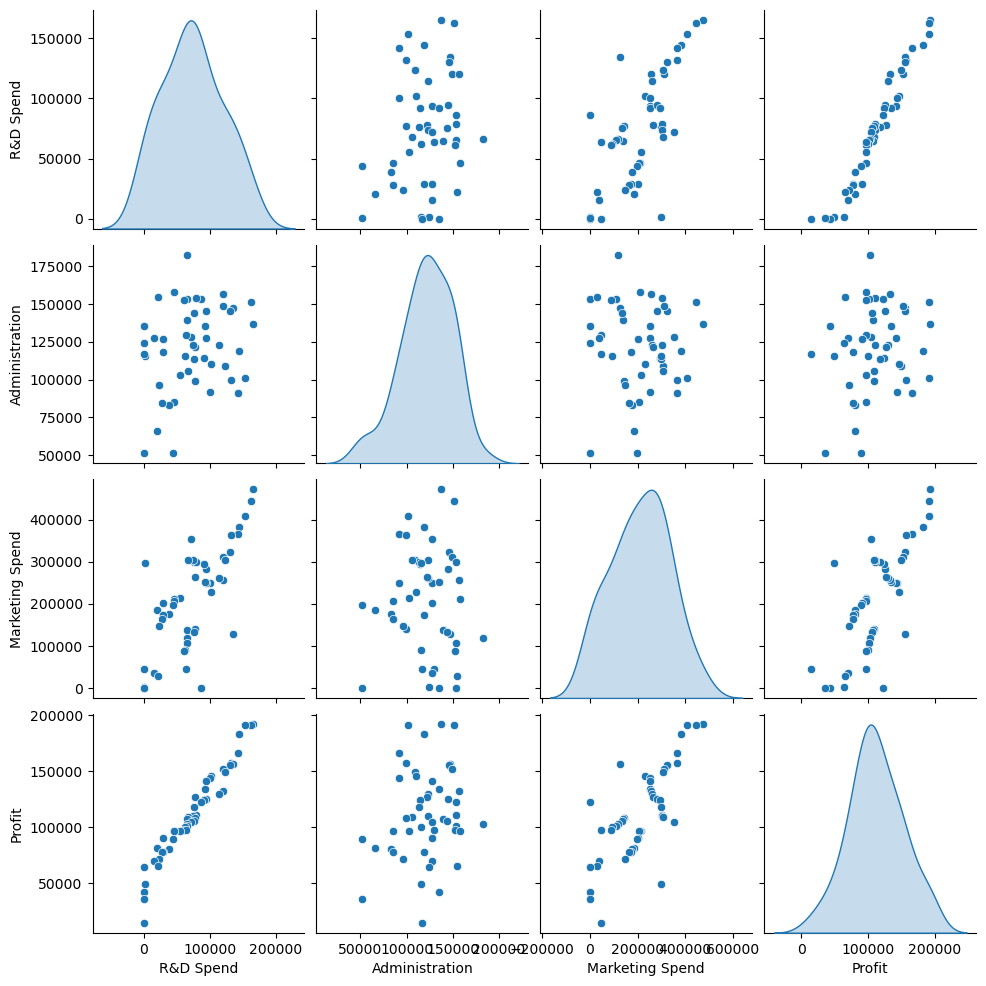

In [51]:
sns.pairplot(df, diag_kind="kde");

## Encoding categorical data

In [52]:
#A one hot encoding is appropriate for categorical data where no relationship exists between categories.
from sklearn.preprocessing import OneHotEncoder

In [53]:
ohe = OneHotEncoder()

In [54]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['State']])

In [55]:
print(ohe.categories_)

[array(['California', 'Florida', 'New York'], dtype=object)]


In [56]:
df[ohe.categories_[0]] = transformed.toarray()
df = df.drop("State", axis = 1)
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit  California  Florida  \
0  165349.20       136897.80        471784.10  192261.83         0.0      0.0   
1  162597.70       151377.59        443898.53  191792.06         1.0      0.0   
2  153441.51       101145.55        407934.54  191050.39         0.0      1.0   
3  144372.41       118671.85        383199.62  182901.99         0.0      0.0   
4  142107.34        91391.77        366168.42  166187.94         0.0      1.0   

   New York  
0       1.0  
1       0.0  
2       0.0  
3       1.0  
4       0.0  


## Select features and response

In [57]:
X = df.drop("Profit", axis = 1)
y = df["Profit"]

In [58]:
X.head(5)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [59]:
X.shape , y.shape

((50, 6), (50,))

## Split the data in train set and test set

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
X_train.shape , X_test.shape

((35, 6), (15, 6))

## Create linear regression object

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model_LR = LinearRegression()

## Train the model using the train sets

In [65]:
model_LR.fit(X_train, y_train)

LinearRegression()

## Make predictions using the test set

In [66]:
y_pred = model_LR.predict(X_test)

In [67]:
resid = pd.DataFrame({"y_test":y_test, "y_pred":np.round(y_pred,2), "error":np.round((y_test-y_pred),2)})
resid.head(5)

,y_test,y_pred,error
13,134307.35,126187.39,8119.96
39,81005.76,85788.82,-4783.06
30,99937.59,99777.03,160.56
45,64926.08,45706.12,19219.96
17,125370.37,127062.21,-1691.84


## Calculate Performance on Test Set

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [69]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [70]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9397108063367285
MAE 		: 7395.433531438699
MSE 		: 84826955.03371616
RMSE 		: 9210.154995097322


## Evaluation for Train Data

In [71]:
y_train_pred = model_LR.predict(X_train)

In [72]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9511471170962384
MAE 		: 6644.55473340725
MSE 		: 81555412.19861054
RMSE 		: 9030.803518990464


## Show regression coefficients

In [73]:
model_LR.coef_

array([ 8.04937292e-01, -9.12577104e-02,  2.80672826e-02,  2.59028652e+02,
        7.17099427e+02, -9.76128080e+02])

In [74]:
resid.mean()

y_test    113826.633333
y_pred    111550.552000
error       2276.081333
dtype: float64

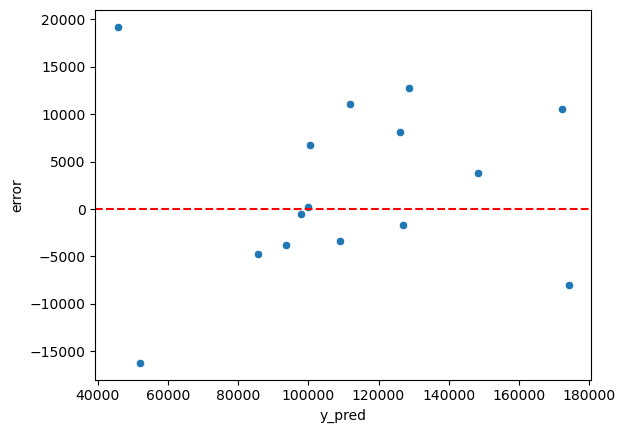

In [75]:
sns.scatterplot(x = "y_pred", y ="error", data = resid )
plt.axhline(y =0, color = "r", linestyle= "--")
plt.show()

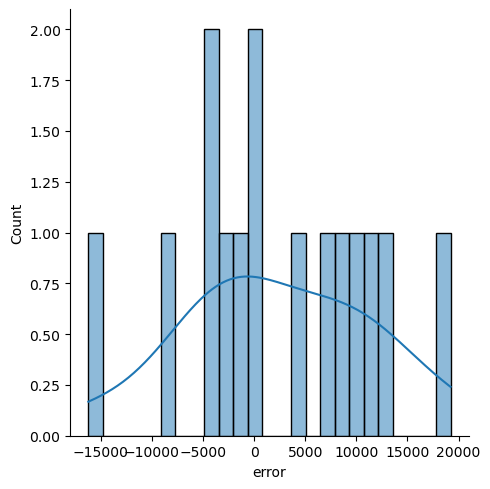

In [76]:
sns.displot(resid["error"], bins = 25, kde = True);
plt.show()

## Predict on New Data

- R&D Spend: 150000
- Administration: 175000
- Marketing Spend: 210000
- State: "New York"

In [77]:
final_model = LinearRegression()

In [78]:
final_model.fit(X,y)

LinearRegression()

In [79]:
y_hat = final_model.predict(X)

In [80]:
residuals = y - y_hat

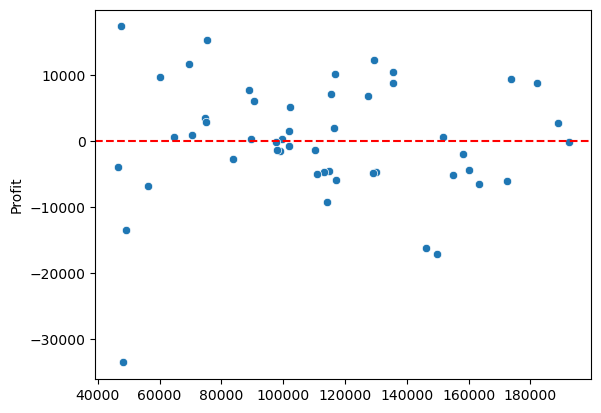

In [81]:
sns.scatterplot(x = y_hat, y =residuals) #fitted vs residual
plt.axhline(y =0, color = "r", linestyle= "--")
plt.show()

In [82]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'California',
       'Florida', 'New York'],
      dtype='object')

In [83]:
new_data = [[150000,175000,210000,0,0,1]]

In [84]:
final_model.predict(new_data)

C:\Users\xbkurceren\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([171926.93876176])

## Write your comments

# # Multicolinarity Solution

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [86]:
vif = pd.DataFrame()
vif["VIF Factor"] = [VIF(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [87]:
vif

,VIF Factor,features
0,2.495511,R&D Spend
1,1.177766,Administration
2,2.416797,Marketing Spend
3,9.044052,California
4,9.443578,Florida
5,9.222969,New York


In [88]:
from sklearn.linear_model import LassoCV

In [89]:
#l1 ratio değerlerine 0 ve 1 değerlerini ekleyerek Lasso ve Ridge seçeneklerini de değerlendirelim.
model_lassoCV = LassoCV( eps=0.001, n_alphas=100)

In [90]:
model_lassoCV.fit(X_train, y_train)

LassoCV()

In [91]:
model_lassoCV.alpha_

3530006.4786621295

In [92]:
y_pred = model_lassoCV.predict(X_test)

In [93]:
#evaluating test data performance

In [94]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9429441328451412
MAE 		: 7142.905540050157
MSE 		: 80277661.4427233
RMSE 		: 8959.780211741989


In [104]:
y_train_pred = model_lassoCV.predict(X_train)

In [105]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9508337730835992
MAE 		: 6622.687333650814
MSE 		: 82078511.31972298
RMSE 		: 9059.719163402528


In [95]:
from sklearn.linear_model import RidgeCV

In [96]:
model_RidgeCV = RidgeCV(alphas=(100.0,500.0), cv=10)

In [97]:
model_RidgeCV.fit(X_train, y_train)

RidgeCV(alphas=(100.0, 500.0), cv=10)

In [98]:
model_RidgeCV.alpha_

500.0

In [99]:
y_pred = model_RidgeCV.predict(X_test)

In [100]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9418429361433469
MAE 		: 7226.367609330623
MSE 		: 81827046.28983378
RMSE 		: 9045.830326168725


In [101]:
y_train_pred = model_RidgeCV.predict(X_train)

In [102]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9508682714967505
MAE 		: 6618.628197895055
MSE 		: 82020919.37964657
RMSE 		: 9056.540143986917


In [ ]:
##Evaulating all performance 